<a href="https://colab.research.google.com/github/EphiWalker/italy_bes/blob/main/italy_bes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Comparing BES Score of Tuscany with the Rest of Italy

I love Florence, and its surrounding region Tuscany. I've always wanted to go there to visit and perhaps live a year or two. But, I wonder, could there be other parts of Italy I should visit or live in rather than Florence?

##Italy's BES System
BES(Benessere Equo e Sostenibile) is a system Italy uses to measure the well-being and sustainability of its societies across genders, age groups and provinces by taking measurements of 100+ indicators grouped under 12 fundamental domains like Social Relationships or Work-Life Balance. Instituto Nazionale di Statistica (the National Statistical Institute), abbreviated as Istat, carries out a survey each year to track the BES score of Italy across genders, age groups and geographical areas.  
  
    
For this project, I'll be using the BES 2023 dataset compiled by Istat, which can be found [here](https://www.istat.it/en/well-being-and-sustainability/the-measurement-of-well-being/indicators).

## A Little About the Dataset


### Domains
Italy's BES system uses several "indicators" (such as life expectancy, homicide rate, air quality, etc) to track people's overall well-being each year. The latest dataset consists of 152 indicators. These indicators are grouped into 12 domains based on what part of society's life they're focused on (such as Health, Safety, Environment, etc).

### Genders
For applicable indicators, survey responses are divided between males and females and the total value is also given. For non-gendered indicators, only the total value is given.

### Geographical Areas
Italy has 100+ provinces which are grouped together to make up 20 adminstrative regions. These 20 regions are also clustered together based on their geographical location to make up the country's 5 macroregions: North-west, North-east, Centre, South, and Islands.

Generally, the BES 2023 dataset doesn't contain information for each province. Instead, it records the data for the 20 regions and 5 macroregions. Certain exceptions may arise that I will explain in detail when neccessary.

##Table of Contents
* Questions
* Data Cleaning & Manipulation
* Exploratory Data Analysis (EDA)
* Conclusions

## Questions Based on the Dataset

Because my primary interest in Italy is in visiting or maybe staying there for a short period of time, I won't be exploring questions that have to do with long-term residence like life expectancy or job satisfaction. The questions I want answered are mainly related to the safety and beauty of the provinces.  

1. Does overall trust for other people correlate with social and cultural participation?
2. Does the presence of one crime suggest the likelihood of a different crime?
3. What kind of relationship does life satisfaction have with trust in the police?

## Personal Questions
1. What are the top 3 regions in Italy I'd like to visit?
2. What about the top 3 places I'd like to live in for about a year?

##Data Cleaning & Manipulation
In this section, I'll go through multiple steps from preparing my working enviornment to manipulating and cleaning the data for use.

###Preparing the Enviornment

I'll start by loading the data from my own github repo for datasets I use in my projects.

In [1151]:
from pandas.core.tools.numeric import to_numeric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

italy_bes = pd.read_excel('https://github.com/EphiWalker/datasets/raw/main/Indicators_region_gender.xlsx',
                          decimal = ',') #specify decimal because Italy uses comma instead of periods for decimals

###Assessing Data

Next, I'll go on and sample the loaded datast at multiple locations.

In [1152]:
italy_bes.head(10) #look at the first 10 cases/rows

,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,2004,2005,2006,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,NOTA
0,Health,01SAL001,Life expectancy at birth,Males,Piemonte,Average number of years,Istat - Life tables of Italian population,77.6,77.9,78.2,...,79.9,80.6,80.4,80.5,80.7,79.1,80.2,80.3,,2022 data are provisional
1,Health,01SAL001,Life expectancy at birth,Males,Valle d'Aosta/Vallée d'Aoste,Average number of years,Istat - Life tables of Italian population,76.9,76.4,77.7,...,78.7,79.4,79.8,79.1,79.9,78.4,80.3,80.3,,2022 data are provisional
2,Health,01SAL001,Life expectancy at birth,Males,Liguria,Average number of years,Istat - Life tables of Italian population,78.0,77.9,78.5,...,79.9,80.6,80.5,80.4,80.8,79.3,80.6,80.4,,2022 data are provisional
3,Health,01SAL001,Life expectancy at birth,Males,Lombardia,Average number of years,Istat - Life tables of Italian population,77.9,78.1,78.4,...,80.6,81.1,81.2,81.3,81.5,79.0,80.9,81.1,,2022 data are provisional
4,Health,01SAL001,Life expectancy at birth,Males,Trentino-Alto Adige/Südtirol,Average number of years,Istat - Life tables of Italian population,78.0,78.5,78.8,...,81.0,81.2,81.5,82.0,81.9,80.5,81.4,81.5,,2022 data are provisional
5,Health,01SAL001,Life expectancy at birth,Males,Provincia Autonoma di Bolzano/Bozen,Average number of years,Istat - Life tables of Italian population,78.0,78.5,78.9,...,80.8,81.2,81.4,81.8,81.8,80.7,81.3,81.1,,2022 data are provisional
6,Health,01SAL001,Life expectancy at birth,Males,Provincia Autonoma di Trento,Average number of years,Istat - Life tables of Italian population,78.0,78.5,78.6,...,81.2,81.4,81.7,82.2,82.1,80.5,81.5,81.9,,2022 data are provisional
7,Health,01SAL001,Life expectancy at birth,Males,Veneto,Average number of years,Istat - Life tables of Italian population,78.2,78.4,78.8,...,80.6,81.0,81.2,81.4,81.7,80.7,81.1,81.2,,2022 data are provisional
8,Health,01SAL001,Life expectancy at birth,Males,Friuli-Venezia Giulia,Average number of years,Istat - Life tables of Italian population,77.8,77.8,78.1,...,79.9,80.4,80.6,80.8,81.3,80.3,79.9,80.3,,2022 data are provisional
9,Health,01SAL001,Life expectancy at birth,Males,Emilia-Romagna,Average number of years,Istat - Life tables of Italian population,78.5,78.8,79.1,...,80.9,81.2,81.2,81.5,81.7,80.3,80.9,81.2,,2022 data are provisional


In [1153]:
italy_bes.sample(10, random_state = 888) #randomly sample 10 cases

,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,2004,2005,2006,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,NOTA
1429,Education and training,02IST002-N22,People with at least upper secondary education...,Total,Puglia,Percentage values,Istat - Labour force survey,,,,...,,,,50.3,51.4,51.4,51.7,52.5,,
5075,Politics and Institutions,06POL005,Trust in police and fire brigade,Females,Centre,Mean score,Istat - Survey on Aspects of daily life,,,,...,7.0,7.3,7.4,7.3,7.5,7.5,7.5,7.5,,
4827,Politics and Institutions,06POL002,Trust in the parliament,Total,Puglia,Mean score,Istat - Survey on Aspects of daily life,,,,...,3.7,3.8,3.4,3.9,4.9,4.7,4.7,4.8,,
5731,Safety,07SIC021,Social decay (or incivilities),Females,Puglia,Percentage values,Istat - Survey on Aspects of daily life,,,,...,,,16.2,9.3,8.9,7.4,5.4,6.3,,Starting from 2020 for the whole time series t...
87,Health,01SAL001,Life expectancy at birth,Total,South,Average number of years,Istat - Life tables of Italian population,80.2,80.2,80.6,...,81.5,82.1,81.8,82.3,82.5,81.8,81.5,81.7,,2022 data are provisional
6626,Environment,10AMB020,Air quality – PM2.5,Total,Marche,Percentage values,Istat - Processing of data from Ispra,,,,...,76.9,61.5,83.3,83.3,76.5,66.7,53.3,,,
3097,Work and life balance,03LAV008,Share of employed persons not in regular occup...,Total,Calabria,Percentage values,Istat - National Accounts,19.5,20.5,21.3,...,23.1,22.2,21.6,22.0,21.5,20.9,,,,
6866,Environment,10AMB014,Protected natural areas,Total,Umbria,Percentage values,Istat - Processing of data from Ministry of th...,,,,...,,17.5,17.5,,,,17.5,,,
1518,Education and training,02IST003-N22,People having completed tertiary education (30...,Total,Campania,Percentage values,Istat - Labour force survey,,,,...,,,,20.4,21.1,21.2,21.2,23.4,,
8436,Quality of services,12SER027,General practitioners with a number of patient...,Total,Islands,Percentage values,Istat - Processing of data from Ministry of He...,12.8,12.7,12.8,...,16.2,16.5,16.2,17.9,18.7,20.1,,,,


In [1154]:
italy_bes.tail(8) #sample the last 8 rows

,DOMINIO,CODICE,INDICATORE,SESSO,TERRITORIO,UNITA_MISURA,FONTE,2004,2005,2006,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,NOTA
8492,Quality of services,SDG-4,Nurses and midwives,Total,North,"Per 1,000 inhabitants",Co.Ge.A.P.S. (Consorzio Gestione Anagrafica Pr...,,,,...,6.1,6.1,6.3,6.3,6.4,6.6,6.4,,,
8493,Quality of services,SDG-4,Nurses and midwives,Total,North-west,"Per 1,000 inhabitants",Co.Ge.A.P.S. (Consorzio Gestione Anagrafica Pr...,,,,...,5.7,5.7,6.0,5.9,6.1,6.3,6.1,,,
8494,Quality of services,SDG-4,Nurses and midwives,Total,North-east,"Per 1,000 inhabitants",Co.Ge.A.P.S. (Consorzio Gestione Anagrafica Pr...,,,,...,6.6,6.6,6.7,6.8,6.8,7.0,6.8,,,
8495,Quality of services,SDG-4,Nurses and midwives,Total,Centre,"Per 1,000 inhabitants",Co.Ge.A.P.S. (Consorzio Gestione Anagrafica Pr...,,,,...,5.9,6.1,6.3,6.4,6.8,7.0,7.1,,,
8496,Quality of services,SDG-4,Nurses and midwives,Total,South and islands,"Per 1,000 inhabitants",Co.Ge.A.P.S. (Consorzio Gestione Anagrafica Pr...,,,,...,5.2,5.5,5.8,5.6,6.2,6.3,6.3,,,
8497,Quality of services,SDG-4,Nurses and midwives,Total,South,"Per 1,000 inhabitants",Co.Ge.A.P.S. (Consorzio Gestione Anagrafica Pr...,,,,...,5.2,5.5,5.9,5.6,6.3,6.3,6.5,,,
8498,Quality of services,SDG-4,Nurses and midwives,Total,Islands,"Per 1,000 inhabitants",Co.Ge.A.P.S. (Consorzio Gestione Anagrafica Pr...,,,,...,5.3,5.5,5.7,5.7,6.1,6.2,6.0,,,
8499,Quality of services,SDG-4,Nurses and midwives,Total,Italy,"Per 1,000 inhabitants",Co.Ge.A.P.S. (Consorzio Gestione Anagrafica Pr...,,,,...,5.7,5.9,6.1,6.1,6.4,6.6,6.5,,,


In [1155]:
italy_bes.shape #looking at the number of rows and columns

(8500, 28)

In [1156]:
italy_bes.columns #the name of all 28 columns

Index([     'DOMINIO',       'CODICE',   'INDICATORE',        'SESSO',
         'TERRITORIO', 'UNITA_MISURA',        'FONTE',           2004,
                 2005,           2006,           2007,           2008,
                 2009,           2010,           2011,           2012,
                 2013,           2014,           2015,           2016,
                 2017,           2018,           2019,           2020,
                 2021,           2022,           2023,         'NOTA'],
      dtype='object')

###Renaming Columns
Though the data is in English, the column labels are Italian. For ease, I'll be translating those into English and use snake_case.

In [1157]:
italy_bes = italy_bes.rename(columns={'DOMINIO':'domain', 'CODICE': 'code', 'INDICATORE': 'indicator',
                            'SESSO': 'sex', 'TERRITORIO' : 'territory', 'UNITA_MISURA' : 'unit',
                            'FONTE' : 'source', 'NOTA': 'note'})

In [1158]:
italy_bes.columns

Index([   'domain',      'code', 'indicator',       'sex', 'territory',
            'unit',    'source',        2004,        2005,        2006,
              2007,        2008,        2009,        2010,        2011,
              2012,        2013,        2014,        2015,        2016,
              2017,        2018,        2019,        2020,        2021,
              2022,        2023,      'note'],
      dtype='object')

###Changing Data Types

In [1159]:
italy_bes.dtypes

domain       object
code         object
indicator    object
sex          object
territory    object
unit         object
source       object
2004         object
2005         object
2006         object
2007         object
2008         object
2009         object
2010         object
2011         object
2012         object
2013         object
2014         object
2015         object
2016         object
2017         object
2018         object
2019         object
2020         object
2021         object
2022         object
2023         object
note         object
dtype: object

Pandas has interpreted all our columns as string data types. We'll need to fix this for the columns of years 2004-2023.

In [1160]:
cols_to_convert = {2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
                   2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023}
for col in cols_to_convert:
  italy_bes[col] = italy_bes[col].apply(pd.to_numeric, errors = 'coerce') #set errors as 'coerce' to convert empty values to nan

In [1161]:
italy_bes.dtypes #check data type

domain        object
code          object
indicator     object
sex           object
territory     object
unit          object
source        object
2004         float64
2005         float64
2006         float64
2007         float64
2008         float64
2009         float64
2010         float64
2011         float64
2012         float64
2013         float64
2014         float64
2015         float64
2016         float64
2017         float64
2018         float64
2019         float64
2020         float64
2021         float64
2022         float64
2023         float64
note          object
dtype: object

###Choosing Indicators
Our data doesn't seem quite right. I'd love the values under the 'indicator' column to be columns instead of being listed as values.

In [1162]:
italy_bes['indicator'].value_counts() #look at how many unique indicators our data has

Life expectancy at birth                                                                                             90
Share of employed people aged 15-64 years working over 60 hours per week (including paid work and household work)    90
Trust in political parties                                                                                           90
Trust in judicial system                                                                                             90
Trust in the parliament                                                                                              90
                                                                                                                     ..
Per capita net wealth                                                                                                 6
Emissions of CO2 and other greenhouse gases                                                                           1
Women in decision-making bodies         

There are 152 indicators in total; that'd mean 152 columns! It's quite obvious that I'll need to choose a few indicators out of the 152. And luckily, all of the indicators are divided into similar categories(domains).

In [1163]:
italy_bes['domain'].unique()

array(['Health', 'Education and training', 'Work and life balance',
       'Economic well-being', 'Social relationships',
       'Politics and Institutions', 'Safety', 'Subjective well-being',
       'Landscape and cultural heritage', 'Environment',
       'Innovation, research and creativity', 'Quality of services'],
      dtype=object)

The dataframe has 12 domains. I can also see the unique indicators contained in a given domain.

In [1164]:
italy_bes[italy_bes['domain'] == 'Health'].value_counts('indicator') #Look at the unique indicators in the Health domain

indicator
Adequate nutrition (standardised rates)                                                         90
Age-standardised cancer mortality rate (20-64 years old)                                        90
Age-standardised mortality rate for dementia and nervous system diseases (65 years and over)    90
Alcohol consumption (standardised rates)                                                        90
Avoidable mortality (age 0-74)                                                                  90
Healthy life expectancy at birth                                                                90
Infant mortality rate                                                                           90
Life expectancy at birth                                                                        90
Life expectancy without activity limitations at 65 years of age                                 90
Mental health index (SF36)                                                                      90


There are 15 indicators for the Health domain. But, none of them match my interests, so I'll continue exploring the next domain.

In [1165]:
#look at the next domain
italy_bes[italy_bes['domain'] == 'Education and training'].value_counts('indicator')

indicator
Cultural participation outside the home                                       90
Early leavers from education and training                                     90
First-time entry rate to university by cohort of upper secondary graduates    90
Individuals with basic or above basic overall digital skills                  90
Participation in life-long learning                                           90
People having completed tertiary education (30-34 years old)                  90
People not in education, employment, or training (NEET)                       90
People with at least upper secondary education level (25-64 years old)        90
Reading books and newspapers                                                  90
STEM graduates                                                                90
Inadequate level of literacy (students in grade 8)                            75
Inadequate level of numeracy (students in grade 8)                            75
Use of libraries  

Chosen indicator:
* Cultural participation outside the home

In [1166]:
#store the chosen indicator in a list
good_indicators = ['Cultural participation outside the home']

#look at the next domain
italy_bes[italy_bes['domain'] == 'Work and life balance'].value_counts('indicator')

indicator
Employed persons working from home                                                                                                              90
Employment rate (20-64 years old)                                                                                                               90
Incidence rate of fatal occupational injuries or injuries leading to permanent disability                                                       90
Involuntary part time                                                                                                                           90
Job satisfaction                                                                                                                                90
Non-participation rate                                                                                                                          90
Share of employed people aged 15-64 years working over 60 hours per week (including paid work and household 

Here, I won't be choosing any indicators as I don't find any of them relevant.

*Note: Reader can jump to the end of the "indicators-choosing" section by clicking [here].*

In [1167]:
italy_bes[italy_bes['domain'] == 'Economic well-being'].value_counts('indicator')

indicator
Disposable income inequality            32
Great difficulty in making ends meet    32
Housing cost overburden rate            32
People at risk of poverty               32
Severe housing deprivation              32
Severe material deprivation rate        32
Very low work intensity                 32
Economic situation of the household     30
Gross disposable income per capita      30
Absolute poverty (incidence)            24
Per capita net wealth                    6
dtype: int64

Here too, I don't need any of the indicators.

In [1168]:
italy_bes[italy_bes['domain']=='Social relationships'].value_counts('indicator')

indicator
Association funding                    90
Civic and political participation      90
Generalized trust                      90
People to rely on                      90
Satisfaction with family relations     90
Satisfaction with friends relations    90
Social participation                   90
Voluntary activity                     90
Nonprofit organizations                30
dtype: int64

Chosen indicators:
* Generalized trust
* Social Participation

In [1169]:
good_indicators.extend(['Generalized trust','Social participation'])

italy_bes[italy_bes['domain'] == 'Politics and Institutions'].value_counts('indicator')

indicator
Prison density                                               90
Trust in judicial system                                     90
Trust in police and fire brigade                             90
Trust in political parties                                   90
Trust in the parliament                                      90
Voter turnout                                                90
Length of civil proceedings                                  30
Women and political representation at regional level         30
Mean age of members of national Parliament                   28
Women and political representation in national Parliament    28
Women in decision-making bodies                               1
Women in the boards of companies listed in stock exchange     1
dtype: int64

Chosen indicators:
* Trust in police and fire brigade

In [1170]:
good_indicators.append('Trust in police and fire brigade')

italy_bes[italy_bes['domain'] == 'Safety'].value_counts('indicator')

indicator
Perception of safety walking alone in the dark    90
Social decay (or incivilities)                    90
Concrete fear                                     32
Intentional homicide rate                         32
Worries of being victim of a sexual violence      32
Burglary                                          30
Intimate partnership violence                     30
Perception of crime risk                          30
Physical violence on women                        30
Pick-pocketing                                    30
Robbery                                           30
Sexual violence on women                          30
dtype: int64

Here, I'll be using all of the indicators listed in the Safety domain.

In [1171]:
#create a numpy array of unique values for the indicator column
for indicate in np.array(italy_bes['indicator'].unique()):

  #check if each unique indicator's domain is Safety
  if italy_bes.loc[italy_bes['indicator']==indicate, 'domain'].values[0] == 'Safety':

    #append to the list of good indicators if the corresponding domain is Safety
    good_indicators.append(indicate)

In [1172]:
italy_bes[italy_bes['domain'] == 'Subjective well-being'].value_counts('indicator')

indicator
Leisure time satisfaction                    90
Life satisfaction                            90
Negative judgement of future perspectives    90
Positive judgement of future perspectives    90
dtype: int64

Chosen indicator:
* Life satisfaction

In [1173]:
good_indicators.append('Life satisfaction')

italy_bes[italy_bes['domain'] == 'Landscape and cultural heritage'].value_counts('indicator')

indicator
Concern about landscape deterioration                                                                 90
People that are not satisfied with the quality of landscape of the place where they live              90
Current expenditure of Municipalities for culture                                                     30
Density and importance of musems' heritage                                                            30
Erosion of farmland from abandonment                                                                  30
Erosion of farmland from urban sprawl                                                                 30
Illegal building rate                                                                                 30
Impact of forest fires                                                                                30
Presence of Historic Parks/Gardens and other Urban Parks recognised of significant public interest    30
Pressures of mining and quarrying activities 

Chosen indicators:
* Current expenditure of Municipalities for culture
* Densitiy and importance of musems' heritage
* Presence of Historic Parks/Gardens and other Urban Parks recognised of significant public interest
* Spread of rural tourism facilities

In [1174]:
good_indicators.extend(['Current expenditure of Municipalities for culture', 'Density and importance of musems\' heritage',
                        'Presence of Historic Parks/Gardens and other Urban Parks recognised of significant public interest',
                        'Spread of rural tourism facilities'])

italy_bes[italy_bes['domain'] == 'Environment'].value_counts('indicator')

indicator
Concern for biodiversity loss                  90
Concern for climate change                     90
Satisfaction for the enviroment                90
Air quality – PM2.5                            30
Population at risk of flood                    30
Warm Spell Duration Index                      30
Urban green                                    30
Soil sealing from artificial land cover        30
Sewage treatment                               30
Protected natural areas                        30
Population at risk of landslides               30
Landfill of waste                              30
Municipal waste generated                      30
Coastal bathing waters                         30
Extreme precipitation events                   30
Contaminated sites                             30
Consecutive Dry Days                           30
Water losses in urban supply system            30
Electricity from renewable sources             26
Domestic material consumption           

Chosen indicators:
* Satisfaction for the environment
* Urban green
* Protected natural areas

In [1175]:
good_indicators.extend(['Satisfaction for the enviroment', 'Urban green','Protected natural areas'])

italy_bes[italy_bes['domain'] == 'Innovation, research and creativity'].value_counts('indicator')

indicator
Brain circulation (italians, 25-39 years old)                                     90
Cultural employment (% of total employment)                                       90
Impact of knowledge workers on employment                                         90
Regular internet users                                                            90
Availability of at least one computer and Internet connection in the household    30
Enterprises with at least 10 persons employed with web sales to end customers     30
Innovation rate of the national productive system                                 30
Municipalities with online services for families                                  30
Patent propensity                                                                 30
R&D intensity                                                                     30
Gross fixed capital formation of intellectual property products                    1
dtype: int64

No chosen indicators here.

In [1176]:
italy_bes[italy_bes['domain'] == 'Quality of services'].value_counts('indicator')

indicator
Unmet need for medical examination                                             90
Frequent users of public transport                                             46
Satisfaction with means of transport                                           46
Physicians                                                                     32
Beds in the residential social-healthcare and social-welfare facilities        30
Composite index of service accessibility                                       30
General practitioners with a number of patients above the maximum threshold    30
Hospital beds in high-care wards                                               30
Hospital patient emigration to a different region                              30
Integrated home assistance service                                             30
Irregularities in electric power distribution                                  30
Irregularities in water supply                                                 30
Nurses

Chosen indicator:
* Composite index of service accessibility

In [1177]:
good_indicators.append('Composite index of service accessibility')

len(good_indicators)

25

Finally! After a long process of deciding which indicators to consider relevant for my research questions, I now have a list of 25 indicators out of the 152. The next step is to get rid of all the rows with indicators that are not in my list, good_indicators.

In [1178]:
italy_bes = italy_bes[italy_bes['indicator'].isin(good_indicators)]

In [1179]:
italy_bes.shape

(1236, 28)

### Drop Rows and Columns
I won't be needing the following columns:
* domain
* code
* unit
* source
* note

In [1180]:
#drop unwanted columns
italy_bes = italy_bes.drop(columns = {'domain', 'code', 'unit', 'source', 'note'})

#check to see if our most recent years has enough data for use
print(italy_bes[2023].isna().sum())
print(italy_bes[2022].isna().sum())
print(italy_bes[2021].isna().sum())

1236
396
184


I'll only be using data from one year to make my regional comparisons, and since all data from 2023 and half the data from 2022 is null, I'll be using data from 2021.

In [1181]:
italy_bes = italy_bes[['indicator', 'sex', 'territory', 2021]]

I believe it's time to visualize how my data is structured. Let's say my indicators are 'Robbery' and 'Urban green'. And let's assume there are two territories, 'Tuscan' and 'Lazio'. Here's how a year's data is represented for two indicators and two territories.

indicator         | sex      |territory             |2021  
------------------|----------|----------------------|--------  
Robbery           |Males     |Tuscany               |value
Robbery           |Males     |Lazio                 |value
Robbery           |Females   |Tuscany               |value
Robbery           |Females   |Lazio                 |value
Robbery           |Total     |Tuscany               |value
Robbery           |Total     |Lazio                 |value
Urban green       |Males     |Tuscany               |value
Urban green       |Males     |Lazio                 |value
Urban green       |Females   |Tuscany               |value
Urban green       |Females   |Lazio                 |value
Urban green       |Total     |Tuscany               |value
Urban green       |Total     |Lazio                 |value

This representation is redundant. It picks an indicator ('Robbery', for example), then divides it across genders ('Males', 'Females', 'Total'), then further divides it across regions ('Tuscany' and 'Lazio'). And then it repeats it for the next indicator.

As a start, I can remove the arrows where 'sex' is 'Males' or 'Females' and simply keep 'Total', since gender distinction is irrelevant for my analyses.

In [1182]:
italy_bes = italy_bes[italy_bes['sex'] == 'Total']

In [1183]:
italy_bes.sample(10, random_state = 25)

,indicator,sex,territory,2021
6376,Spread of rural tourism facilities,Total,Liguria,12.9
5641,Perception of safety walking alone in the dark,Total,Calabria,74.2
4261,Social participation,Total,Sardegna,17.1
5383,Pick-pocketing,Total,Lombardia,5.1
5335,Intentional homicide rate,Total,Molise,0.3
2288,Cultural participation outside the home,Total,Provincia Autonoma di Trento,12.0
5390,Pick-pocketing,Total,Toscana,3.5
6884,Protected natural areas,Total,Italy,21.7
5747,Social decay (or incivilities),Total,Lombardia,7.3
6187,Current expenditure of Municipalities for culture,Total,North-west,NaN


Now, I can drop the 'sex' column since it's of no use.

In [1184]:
italy_bes = italy_bes.drop(columns = 'sex')

In [1185]:
italy_bes.sample(5, random_state = 64)

,indicator,territory,2021
6860,Protected natural areas,Provincia Autonoma di Bolzano/Bozen,24.50
6422,Presence of Historic Parks/Gardens and other U...,Basilicata,0.20
6870,Protected natural areas,Molise,26.40
6216,Density and importance of musems' heritage,North,1.37
5102,Trust in police and fire brigade,North,7.60


### Transposing Rows and Columns

I only have three columns left now. And even though I have gotten rid of the redundance based on sex, there still remains another repetition based on territory(region).  
Something else, I want to do is make the values inside the 'indicator' column into headers for columns themselves (note that I can't use the transpose method here because it'd result in a wrong dataset because of the repitition in our 'territory' column).

In [1186]:
#create a list of all the unique territories
region_list = np.array(italy_bes['territory'].unique())

#iterate through our good_indicators list that we compiled earlier
for col in good_indicators:

  #create new columns for all the indicators and fill their rows with numpy nan
  italy_bes[col] = np.nan

In [1187]:
#iterate through the list of regions
for reg in region_list:

  #iterate through the list of good indicators
  for indicate in good_indicators:

    #find the value at 2021 for a cell whose indicator and territory values match 'reg' and 'indicate'
    x = italy_bes.loc[(italy_bes['indicator'] == indicate) & (italy_bes['territory'] == reg), 2021].values[0]

    #On the newly created column that matches 'indicate' and 'reg', put the value of 'x'
    italy_bes.loc[italy_bes['territory'] == reg, indicate] = x

After the above operation, we can get rid of the territory repetitions, as well as the '2021' and 'indicator' columns.

In [1188]:
#drop rows with duplicate territories
italy_bes = italy_bes.drop_duplicates(subset = ['territory'])

#drop the now-obsolete indicator and 2021 columns
italy_bes = italy_bes.drop(columns = ['indicator', 2021])

In [1189]:
italy_bes.shape

(30, 26)

### Renaming Columns

In [1190]:
new_columns = ['region', 'cultural_participation', 'general_trust', 'social_participation', 'police_trust', 'homicide',
               'burglary', 'pick_pocketing', 'robbery', 'physical_violence_women', 'sexual_violence_women', 'partner_violence',
               'sexual_violence_fear', 'nightwalk_safety', 'concrete_fear', 'social_decay', 'crime_risk_perception',
               'life_satisfaction', 'culture_budget', 'heritage_density', 'urban_park_presence', 'rural_tourism',
               'environment_satisfaction', 'urban_green', 'protected_natural_areas', 'service_inaccessibility']


italy_bes.columns.values[0:34] = new_columns

### Dropping Null Columns & Other Miscellaneous Cleaning

In [1191]:
italy_bes['culture_budget'].isna().sum()

30

Some of our columns, even though they were our chosen indicators, do not have enough data while some have no data at all like our 'culture_budget' column above. To avoid issues with having insufficient data, I'll drop columns that have null values for more than half the territories.

In [1192]:
italy_bes = italy_bes.loc[:, (italy_bes.isna().sum(axis=0)<=10)]


#look at how many of the remaining columns have a few null values in them
italy_bes.isna().sum(axis=0)

region                      0
cultural_participation      0
general_trust               0
social_participation        0
police_trust                0
homicide                    0
burglary                    0
pick_pocketing              0
robbery                     0
nightwalk_safety            0
social_decay                0
crime_risk_perception       0
life_satisfaction           0
heritage_density            0
urban_park_presence         0
rural_tourism               0
environment_satisfaction    0
urban_green                 0
protected_natural_areas     0
service_inaccessibility     0
dtype: int64

In [1193]:
#look at the unique values in our region column
italy_bes['region'].unique()

array(['Piemonte', "Valle d'Aosta/Vallée d'Aoste", 'Liguria', 'Lombardia',
       'Trentino-Alto Adige/Südtirol',
       'Provincia Autonoma di Bolzano/Bozen',
       'Provincia Autonoma di Trento', 'Veneto', 'Friuli-Venezia Giulia',
       'Emilia-Romagna', 'Toscana', 'Umbria', 'Marche', 'Lazio',
       'Abruzzo', 'Molise', 'Campania', 'Puglia', 'Basilicata',
       'Calabria', 'Sicilia', 'Sardegna', 'North', 'North-west',
       'North-east', 'Centre', 'South and islands', 'South', 'Islands',
       'Italy'], dtype=object)

In addition to the 20 regions, the data has 10 extra values for the territory column. Here are the reasons why:
* 2 provinces, Bolzano/Bozen and Trento, have been given their own values (possibly with the aim of enabling taking a closer look at these provinces). But, both of these provinces are already represented under one of the 20 regions, so their distinction serves no purpose in the setting of this project which aims to compare the 20 regions.  

* 5 of the values are Italy's 5 macroregions.  

* 2 geographical clusters have been created from the 5 macro regions to further provide statistics over even larger areas of the country.  

* The country's overall statistics are also recorded under the value 'Italy', which again serves no pupose in this project.

In [1194]:
#drop rows of the 5 macroregions as well as the 5 extra territories
italy_bes = italy_bes[~italy_bes['region'].isin(['Provincia Autonoma di Bolzano/Bozen',
                                                    'Provincia Autonoma di Trento', 'North',
                                                    'North-west', 'North-east', 'Centre',
                                                    'South and islands', 'South', 'Islands', 'Italy'])]

Now that my data contains a lot fewer variables than the original, it's also a bit easier to describe. Below is a table describing each of the above features.

Feature | Description             | Unit
--------|-------------------------|-----
region  |a region or macroregion in Italy|Region names
cultural_participation|People who did 2 or more outdoor activities in the past year|Percentage
general_trust|People who feel others are worthy of trust|Percentage
social_participation|People who have done one or more social activity in the past year|Percentage
police_trust|Scale of trust in police & fire brigade (0-10), worst to best|Mean score
homicide|Number of intentional homicides|Per 1,000 residents
burglary|Number of burglary victims|Per 1,000 households
pick_pocketing|Number of victims of pick pocketing|Per 1,000 residents
robbery|Number of robbery victims|Per 1,000 residents
physical_violence_women|Female victims of physical violence (last 5 years)|Percentage
sexual_violence_women|Female victims of sexual violence (last 5 years)|Percentage
partner_violence|Physical/sexual violence by partner or ex-partner (last 5 years)|Percentage
sexual_violence_fear|People with fear of sexual violence on themselves or family|Percentage
nightwalk_safety|People who feel safe walking alone at night|Percentage
concrete_fear|People afraid of becoming concretely crime victimes|Percentage
social_decay|People who notice elements of social decay (drugs, prostitutes, etc)|Percentage
crime_risk_perception|Households declaring high risk of crime|Percentage
life_satisfaction|Percentage of people with a level of life satisfaction from 8 to 10|Percentage
culture_budget|Expenditure of municpalities to preserve cultural properties/activities|Euro per capita
heritage_density|Number of permanent exhibition facilities (museums, etc)|Per 100 sq.km
urban_park_presence|Total area of all parks in the region|Per 100 sq.m of land
rural_tourism|Number of farmhouses|Per 100 sq.km
environment_satisfaction|People very satisfied of situations in their environment (air, water, noise)|Percentage
urban_green|Sq. meters of urban gardens in provincial capitals per inhabitants|Sq. M per resident
protected_natural_areas|Percentage share of terrestrial protected areas|Percentage
service_inaccessibility|Percentage of households who find it difficult to reach basic services|Percentage

##EDA

### 1. Does Overall Trust for Other People Correlate with Social and Cultural Participation?

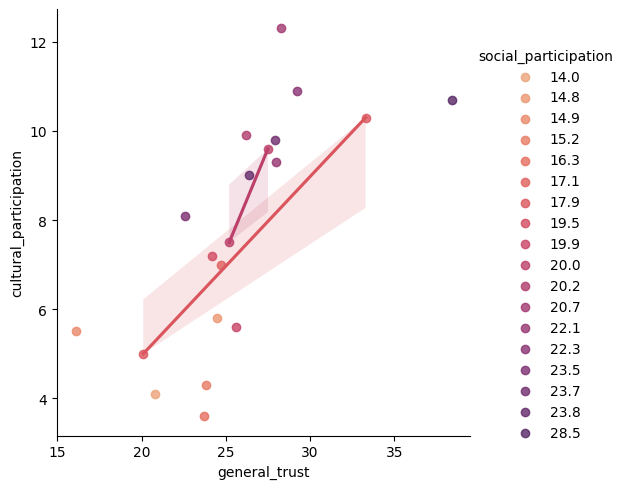

In [1195]:
sns.lmplot(data = italy_bes, x = 'general_trust', y = 'cultural_participation',
           hue='social_participation', palette='flare')

Yes, general trust has a positive correlation with cultural and social participation.

### 2. Does the Presence of One Crime Suggest the Likelihood of a Different Crime?

<Axes: xlabel='burglary', ylabel='robbery'>

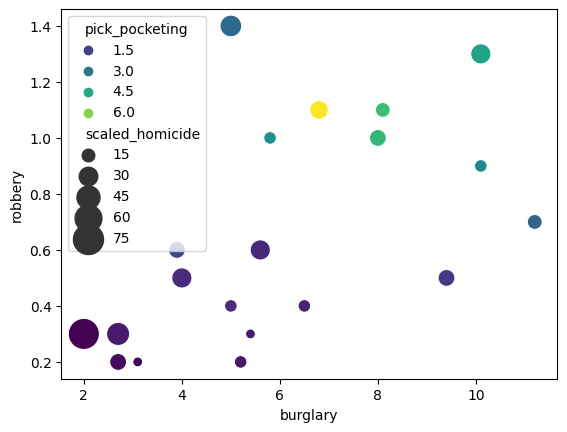

In [1196]:
italy_bes['scaled_homicide'] = italy_bes['homicide'] * 50
sns.scatterplot(data = italy_bes, x = 'burglary', y='robbery', size='scaled_homicide',
                hue = 'pick_pocketing', sizes= (50, 500), palette = 'viridis')

Robbery, Pickpocketing and Burglary seem to correlate with one another (the higher the robber or the burglary, the greener the colors are which signifiy rise in Pickpocketing).  
  
  But, homicide doesn't seem to have a positive relationship with any of them as lower values of robbery and burglary have larger sized dots for rise in homicide. Furthermore, we can see pickpocketing doesn't have a positive relationship with homicide by the fact that most of the larger sized dots are less green than the smaller ones.  
    
  All in all, while one crime of stealing might point to a likelihood of another crime of stealing, none of the stealing crimes are correlated to a rise homicide.

### 3. What Kind of Relationship Does Life Satisfaction Have with Trust in the Police?

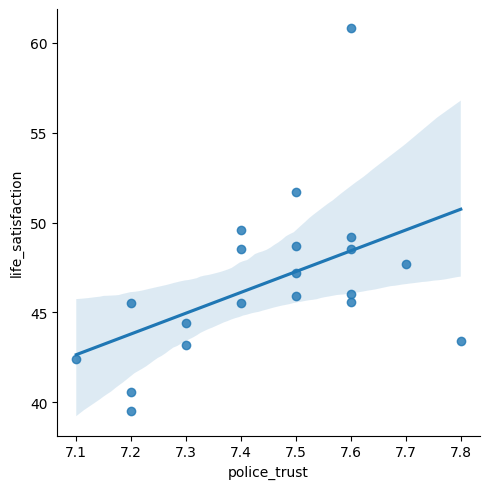

In [1197]:
sns.lmplot(italy_bes, x='police_trust', y='life_satisfaction')

Life satisfaction and police trust have a positive relationship.

## Conclusion (Personal Questions)
1. Based on my investigations, what are the top 3 regions I'd like to visit?

Police trust (5 or more)  
Rate 1 to 3 based on heritage & environmental beauty.



2. What about the top 3 regions I'd like to live in for about a year?  

Police trust (5 or more)  

Rate 1 to 3 based on service accessibility and life satisfaction.

3. What regional clusters would I like to live in?

Police trust (5 or more)
Service accessibility (more than the median)
Rate 1 to 3 based on heritage density. The closer heritage places there are the more I want to live there.

First, I'll get only the regions where police_trust is above the median, so as to make sure the place is safe.

In [1198]:
m = italy_bes['police_trust'].median()

safe_df = italy_bes[italy_bes['police_trust'] >= m]

Then, I'll sort this new dataset of safe regions by their heritage_density (how many permanent exhibition places they have per 100 sq.km)

<Axes: xlabel='heritage_density', ylabel='region'>

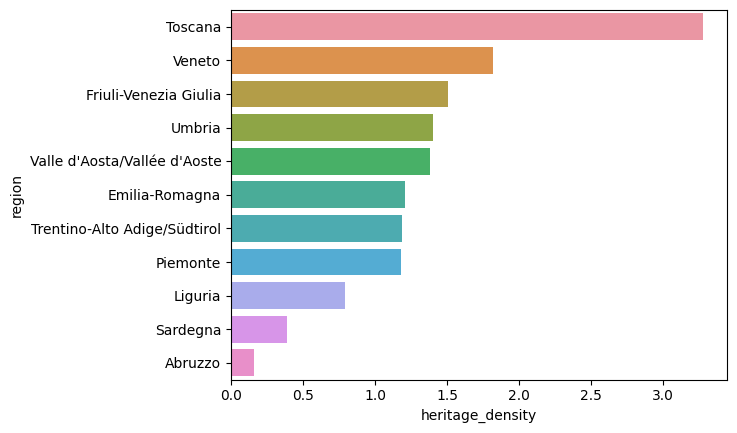

In [1199]:
sns.barplot(data = safe_df, x='heritage_density', y='region', orient = 'h',
            order=safe_df.sort_values(by=['heritage_density'], ascending=False).set_index('region').index)

Ecco! Toscana, Veneto, and Friuli-Venezia Giulia are the top 3 regions I should visit!

### 2. What About the Top 3 Regions I'd Like to Live in for About a Year?

Here too, I'll use the safe_df dataset with regions of police_trust above the median value.

But, in addition, I'd like to sort the regions based on their service_inaccessibility (percentage of households who find it difficult to access basic services).

In [1200]:
safe_df.sort_values(by = 'service_inaccessibility')['region']

2286    Trentino-Alto Adige/Südtirol
2291                  Emilia-Romagna
2303                        Sardegna
2289                          Veneto
2282                        Piemonte
2290           Friuli-Venezia Giulia
2293                          Umbria
2296                         Abruzzo
2284                         Liguria
2292                         Toscana
2283    Valle d'Aosta/Vallée d'Aoste
Name: region, dtype: object

The top 3 regions where I'd live in for about a year are:
* Trentino-Alto Adige/Sudtirol,
* Emilia-Romagna, and
* Sardegna.  
  
  Note that Toscana is only second to last among the safer regions in its service inaccessibility.



---
**Thank you for reading my analysis. *Ciao!***